# 4. Training Classifier

In [167]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [205]:
# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [206]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [207]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [266]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 5

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Random Forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [267]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [268]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [269]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9434181068095491


In [184]:
random_search.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'class_weight': 'balanced',
 'C': 1.9}

### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [185]:
# Create the parameter grid based on the results of random search 
param_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['sag'],
               'class_weight': ['balanced']}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [186]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.2s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.8999999999999999,
                               1.0999999999999999, 1.3, 1.5, 1.7, 1.9],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'solver': ['sag

In [187]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1.9, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9701333333333334


In [188]:
best_classifier = grid_search.best_estimator_

best_classifier

LogisticRegression(C=1.9, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

### Model fit and performance

In [209]:
best_classifier.fit(features_train, labels_train)

LogisticRegression(C=1.9, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [210]:
classifier_pred = best_classifier.predict(features_test)

In [211]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.987837,0.943114


In [162]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.92      0.96      0.94        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.93      0.93        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



### Confusion Matrix

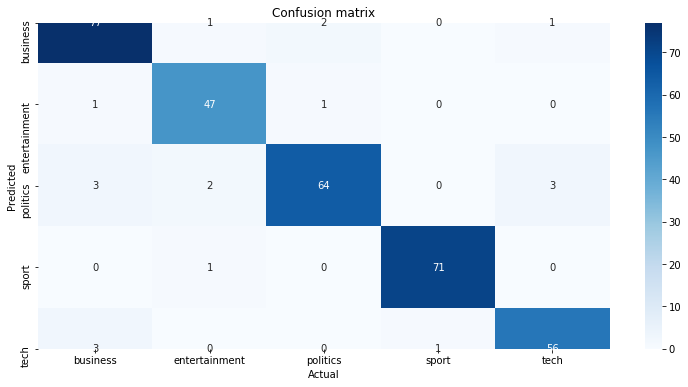

In [163]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [164]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9401197604790419

In [165]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9431137724550899

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf

In [262]:
def featureLabelAwal():
    # Dataframe
    path_df = "Data/df.pickle"
    with open(path_df, 'rb') as data:
        df = pickle.load(data)

    # features_train
    path_features_train = "Data/features_train.pickle"
    with open(path_features_train, 'rb') as data:
        features_train = pickle.load(data)

    # labels_train
    path_labels_train = "Data/labels_train.pickle"
    with open(path_labels_train, 'rb') as data:
        labels_train = pickle.load(data)

    # features_test
    path_features_test = "Data/features_test.pickle"
    with open(path_features_test, 'rb') as data:
        features_test = pickle.load(data)

    # labels_test
    path_labels_test = "Data/labels_test.pickle"
    with open(path_labels_test, 'rb') as data:
        labels_test = pickle.load(data)
        
    return features_train, labels_train, features_test, labels_test

In [231]:
def tf_idf(ngram_range, min_df, max_df, max_features, path):
    tfidf = TfidfVectorizer(encoding='utf-8',
                            ngram_range=ngram_range,
                            stop_words=None,
                            lowercase=False,
                            max_df=max_df,
                            min_df=min_df,
                            max_features=max_features,
                            norm='l2',
                            sublinear_tf=True)

    features_train = tfidf.fit_transform(X_train).toarray()
    labels_train = y_train
    print(features_train.shape)

    features_test = tfidf.transform(X_test).toarray()
    labels_test = y_test
    print(features_test.shape)
    
    # X_train
    with open( path+'/X_train.pickle', 'wb') as output:
        pickle.dump(X_train, output)

    # X_test    
    with open(path+'/X_test.pickle', 'wb') as output:
        pickle.dump(X_test, output)

    # y_train
    with open(path+'/y_train.pickle', 'wb') as output:
        pickle.dump(y_train, output)

    # y_test
    with open(path+'/y_test.pickle', 'wb') as output:
        pickle.dump(y_test, output)

    # df
    with open(path+'/file.pickle', 'wb') as output:
        pickle.dump(file, output)

    # features_train
    with open(path+'/features_train.pickle', 'wb') as output:
        pickle.dump(features_train, output)

    # labels_train
    with open(path+'/labels_train.pickle', 'wb') as output:
        pickle.dump(labels_train, output)

    # features_test
    with open(path+'/features_test.pickle', 'wb') as output:
        pickle.dump(features_test, output)

    # labels_test
    with open(path+'/labels_test.pickle', 'wb') as output:
        pickle.dump(labels_test, output)

    # TF-IDF object
    with open(path+'/tfidf.pickle', 'wb') as output:
        pickle.dump(tfidf, output)
    
    return features_train, labels_train, features_test, labels_test

In [232]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

In [278]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.
def crossVal(choice): 

    if choice == 1:
        classifier = LogisticRegression(random_state = 8)
        print('Parameters currently in use in {}:\n'.format(models[choice]))
        pprint(classifier.get_params())
        random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
        
    elif choice==2:
        classifier = MultinomialNB()
        print('Parameters currently in use in {}:\n'.format(models[choice]))
        print(classifier)
    elif choice==3:
        classifier =KNeighborsClassifier()
        print('Parameters currently in use in {}:\n'.format(models[choice]))
        pprint(classifier.get_params())
    elif choice==4:
        classifier =svm.SVC(random_state=8)
        print('Parameters currently in use in {}:\n'.format(models[choice]))
        pprint(classifier.get_params())
        random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
    elif choice==5:
        classifier = RandomForestClassifier(random_state = 8)
        print('Parameters currently in use in {}:\n'.format(models[choice]))
        pprint(classifier.get_params())
        random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
    # Definition of the random search
    random_search = RandomizedSearchCV(estimator=classifier,
                                       param_distributions=random_grid,
                                       n_iter=50,
                                       scoring='accuracy',
                                       cv=3, 
                                       verbose=1, 
                                       random_state=8)

    # Fit the random search model
    random_search.fit(features_train, labels_train)
    
    print("The best hyperparameters from Random Search are:")
    print(random_search.best_params_)
    print("")
    print("The mean accuracy of a model with these hyperparameters is:")
    print(random_search.best_score_)
    print("")
    
    if choice == 1:
        # Create the parameter grid based on the results of random search 
        param_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
                       'multi_class': [random_search.best_params_['multi_class']],
                       'solver': [random_search.best_params_['solver']],
                       'class_weight': [random_search.best_params_['class_weight']]}

        # Create a base model
        classifier = LogisticRegression(random_state=8)
    
    elif choice == 4:
        param_grid = {'C': [.0001, .001, .01],
                  'kernel': [random_search.best_params_['kernel']],
                  'gamma': [random_search.best_params_['gamma']],
                  'degree': [random_search.best_params_['degree']],
                  'probability': [True]
                 }
        classifier = svm.SVC(random_state=8)
        
    elif choice == 5:
        param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': [random_search.best_params_['max_features']],
               'max_depth': [random_search.best_params_['max_depth']],
               'min_samples_split': [random_search.best_params_['min_samples_split']],
               'min_samples_leaf': [random_search.best_params_['min_samples_leaf']],
               'bootstrap': [random_search.best_params_['bootstrap']]
                     }
        classifier = RandomForestClassifier(random_state=8)
        
    # Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
    cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=classifier, 
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=cv_sets,
                               verbose=1)

    # Fit the grid search to the data
    grid_search.fit(features_train, labels_train)
    
    print("The best hyperparameters from Grid Search are:")
    print(grid_search.best_params_)
    print("")
    print("The mean accuracy of a model with these hyperparameters is:")
    print(grid_search.best_score_)
    print("")
    
    best_classifier = grid_search.best_estimator_
    print(best_classifier)

    return best_classifier

In [302]:
def fitandperform(features_train, labels_train, features_test, labels_test, best_classifier):
    best_classifier.fit(features_train, labels_train)
    classifier_pred = best_classifier.predict(features_test)
    d = {
     'Model': models[choice],
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
    }

    df_models = pd.DataFrame(d, index=[0])
    df_models
    
    # Classification report
    print("Classification report")
    print(classification_report(labels_test,classifier_pred))
    print("")
    
    base_model = classifier
    base_model.fit(features_train, labels_train)
    print('Accuracy Base Model = ',accuracy_score(labels_test, base_model.predict(features_test)))
    
    best_classifier.fit(features_train, labels_train)
    print('Accuracy Best Classifier = ',accuracy_score(labels_test, best_classifier.predict(features_test)))

## 1

In [225]:
#1
df.to_csv (r'News_dataset.csv', index = False, header=True)
file = pd.read_csv('News_dataset.csv')
file['Content_Parsed'] = file['Content']
file.head()

,File_Name,Category,Content,Content_Parsed,Category_Code
0,Data/bbc\business\001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,Ad sales boost Time Warner profit\n\nQuarterly...,0
1,Data/bbc\business\002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...,Dollar gains on Greenspan speech\n\nThe dollar...,0
2,Data/bbc\business\003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos unit buyer faces loan claim\n\nThe owner...,0
3,Data/bbc\business\004.txt,business,High fuel prices hit BA's profits\n\nBritish A...,High fuel prices hit BA's profits\n\nBritish A...,0
4,Data/bbc\business\005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod takeover talk lifts Domecq\n\nShares in...,0


## 2

In [136]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np


nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adriansyah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adriansyah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

------------------------------------------------------------



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adriansyah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
def delChar(file):
    file['Content_Parsed'] = file['Content'].str.replace("\r", " ")
    file['Content_Parsed'] = file['Content_Parsed'].str.replace("\n", " ")
    file['Content_Parsed'] = file['Content_Parsed'].str.replace("    ", " ")
    file['Content_Parsed'] = file['Content_Parsed'].str.replace('"', '')
    return file

def lower(file):
    file['Content_Parsed'] = file['Content_Parsed'].str.lower()
    return file

def delPunct(file):
    punctuation_signs = list("?:!.,;")
    file['Content_Parsed'] = file['Content_Parsed']

    for punct_sign in punctuation_signs:
        file['Content_Parsed'] = file['Content_Parsed'].str.replace(punct_sign, '')
    
    return file

def delPossessivepron(file):
    # Remove possessive pronouns
    file['Content_Parsed'] = file['Content_Parsed'].str.replace("'s", "")
    return file

def lemmatizer(file):
    # Saving the lemmatizer into an object
    wordnet_lemmatizer = WordNetLemmatizer()
    
    nrows = len(file)
    lemmatized_text_list = []

    for row in range(0, nrows):

        # Create an empty list containing lemmatized words
        lemmatized_list = []

        # Save the text and its words into an object
        text = file.loc[row]['Content_Parsed']
        text_words = text.split(" ")

        # Iterate through every word to lemmatize
        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

        # Join the list
        lemmatized_text = " ".join(lemmatized_list)

        # Append to the list containing the texts
        lemmatized_text_list.append(lemmatized_text)

    file['Content_Parsed'] = lemmatized_text_list
    
    return file

def stopword(file):
    stop_words = list(stopwords.words('english'))
    for stop_word in stop_words:
        regex_stopword = r"\b" + stop_word + r"\b"
        file['Content_Parsed'] = file['Content_Parsed'].str.replace(regex_stopword, '')
    return file

In [277]:
#Model untuk SOAL 2 dan 3 Logistic Regression
choice = 1
best_classifier = crossVal(choice)

Parameters currently in use in Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.0s finished


The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.9}

The mean accuracy of a model with these hyperparameters is:
0.9587527985309285

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.5s finished


The best hyperparameters from Grid Search are:
{'C': 1.9, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9701333333333334
LogisticRegression(C=1.9, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)


### 2a

In [281]:
#2a
path = 'a'
file.to_csv (r'datase_no_normalization.csv', index = False, header=True)
file = pd.read_csv('News_dataset.csv')
file['Content_Parsed'] = file['Content']

In [282]:
file['Content_Parsed'].head()

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: Content_Parsed, dtype: object

In [283]:
X_train, X_test, y_train, y_test = train_test_split(file['Content_Parsed'], 
                                                    file['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [284]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

features_train, labels_train, features_test, labels_test = tf_idf(ngram_range, min_df, max_df, max_features, path)

(1891, 300)
(334, 300)


In [285]:
fitandperform(features_train, labels_train, features_test, labels_test, best_classifier)

Classification report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        81
           1       0.92      0.96      0.94        49
           2       0.92      0.85      0.88        72
           3       0.99      0.99      0.99        72
           4       0.92      0.92      0.92        60

    accuracy                           0.92       334
   macro avg       0.92      0.92      0.92       334
weighted avg       0.92      0.92      0.92       334


Accuracy Base Model =  0.8952095808383234
Accuracy Best Classifier =  0.9191616766467066


### 2b

In [286]:
#2b
path = 'b'
file = pd.read_csv('News_dataset.csv')
file['Content_Parsed'] = file['Content']
file = delChar(file)
file = lower(file)
file = delPunct(file)
file = delPossessivepron(file)
file = stopword(file)
file.to_csv (r'datase_no_lemmatization.csv', index = False, header=True)

In [287]:
file['Content_Parsed'].head()

0    ad sales boost time warner profit  quarterly p...
1    dollar gains  greenspan speech   dollar  hit  ...
2    yukos unit buyer faces loan claim   owners  em...
3    high fuel prices hit ba profits  british airwa...
4    pernod takeover talk lifts domecq  shares  uk ...
Name: Content_Parsed, dtype: object

In [288]:
X_train, X_test, y_train, y_test = train_test_split(file['Content_Parsed'], 
                                                    file['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [289]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

features_train, labels_train, features_test, labels_test = tf_idf(ngram_range, min_df, max_df, max_features, path)

(1891, 300)
(334, 300)


In [290]:
fitandperform(features_train, labels_train, features_test, labels_test, best_classifier)

Classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        81
           1       0.91      0.98      0.94        49
           2       0.98      0.90      0.94        72
           3       1.00      0.99      0.99        72
           4       0.95      0.90      0.92        60

    accuracy                           0.95       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334


Accuracy Base Model =  0.9251497005988024
Accuracy Best Classifier =  0.9461077844311377


### 2c

In [291]:
#2c
path = 'c'
file = pd.read_csv('News_dataset.csv')
file['Content_Parsed'] = file['Content']
file = delChar(file)
file = lower(file)
file = delPunct(file)
file = delPossessivepron(file)
file = lemmatizer(file)
file.to_csv (r'datase_no_stopword.csv', index = False, header=True)

In [292]:
file['Content_Parsed'].head()

0    ad sales boost time warner profit  quarterly p...
1    dollar gain on greenspan speech  the dollar ha...
2    yukos unit buyer face loan claim  the owners o...
3    high fuel price hit ba profit  british airways...
4    pernod takeover talk lift domecq  share in uk ...
Name: Content_Parsed, dtype: object

In [293]:
X_train, X_test, y_train, y_test = train_test_split(file['Content_Parsed'], 
                                                    file['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

features_train, labels_train, features_test, labels_test = tf_idf(ngram_range, min_df, max_df, max_features, path)

(1891, 300)
(334, 300)


In [294]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [295]:
fitandperform(features_train, labels_train, features_test, labels_test, best_classifier)

Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        81
           1       0.89      0.96      0.92        49
           2       0.90      0.89      0.90        72
           3       1.00      0.97      0.99        72
           4       0.95      0.92      0.93        60

    accuracy                           0.93       334
   macro avg       0.93      0.93      0.93       334
weighted avg       0.93      0.93      0.93       334


Accuracy Base Model =  0.8892215568862275
Accuracy Best Classifier =  0.9311377245508982


## 3

In [296]:
file = pd.read_csv('News_dataset.csv')

X_train, X_test, y_train, y_test = train_test_split(file['Content_Parsed'], 
                                                    file['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [305]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = [175,200,250]
path = ['max_features/175','max_features/200','max_features/250']

In [306]:
for i in range (len(path)):
    print(path[i])
    features_train, labels_train, features_test, labels_test = tf_idf(ngram_range, min_df, max_df, max_features[i], path[i])
    fitandperform(features_train, labels_train, features_test, labels_test, best_classifier)
    print("")

max_features/175
(1891, 175)
(334, 175)
Classification report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        81
           1       0.87      0.98      0.92        49
           2       0.94      0.85      0.89        72
           3       0.99      0.96      0.97        72
           4       0.91      0.87      0.89        60

    accuracy                           0.92       334
   macro avg       0.92      0.92      0.92       334
weighted avg       0.92      0.92      0.92       334


Accuracy Base Model =  0.9101796407185628
Accuracy Best Classifier =  0.9161676646706587

max_features/200
(1891, 200)
(334, 200)
Classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        81
           1       0.87      0.96      0.91        49
           2       0.94      0.86      0.90        72
           3       0.99      0.99      0.99        72
           4       0.93  

## 4

### Model Logistic Regression

In [307]:
choice = 1
best_classifier = crossVal(choice)

Parameters currently in use in Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best hyperparameters from Random Search are:
{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': None, 'C': 1.7}

The mean accuracy of a model with these hyperparameters is:
0.9508179676166998

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best hyperparameters from Grid Search are:
{'C': 1.9, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

The mean accuracy of a model with these hyperparameters is:
0.9626666666666667

LogisticRegression(C=1.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=8, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished


In [309]:
features_train, labels_train, features_test, labels_test = featureLabelAwal()
fitandperform(features_train, labels_train, features_test, labels_test, best_classifier)

Classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        81
           1       0.92      0.96      0.94        49
           2       0.97      0.89      0.93        72
           3       0.97      0.99      0.98        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334


Accuracy Base Model =  0.9281437125748503
Accuracy Best Classifier =  0.9431137724550899


### Model Random Forest

In [310]:
choice = 5
best_classifier = crossVal(choice)

Parameters currently in use in Random Forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.7min finished


The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9434181068095491

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   45.6s finished


The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}

The mean accuracy of a model with these hyperparameters is:
0.9434666666666667

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)


In [311]:
features_train, labels_train, features_test, labels_test = featureLabelAwal()
fitandperform(features_train, labels_train, features_test, labels_test, best_classifier)

Classification report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        81
           1       0.92      0.92      0.92        49
           2       0.97      0.88      0.92        72
           3       0.99      0.96      0.97        72
           4       0.95      0.93      0.94        60

    accuracy                           0.93       334
   macro avg       0.94      0.93      0.93       334
weighted avg       0.93      0.93      0.93       334


Accuracy Base Model =  0.9281437125748503
Accuracy Best Classifier =  0.9311377245508982
